<a href="https://colab.research.google.com/github/filipeexm/ProcessamentoDigitalDeImagens/blob/main/PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidade Federal de Alagoas - UFAL**

**Ciência da computação**

Processamento Digital de Imagens 

Luiz Filipe Soares de Melo Barbosa

# **Bibliotecas necessárias**

In [ ]:
import cv2 as cv 
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import numpy as np
from matplotlib import pyplot as plt

image_path = "/content/drive/MyDrive/PDI/"

# **Imagem utilizada**

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


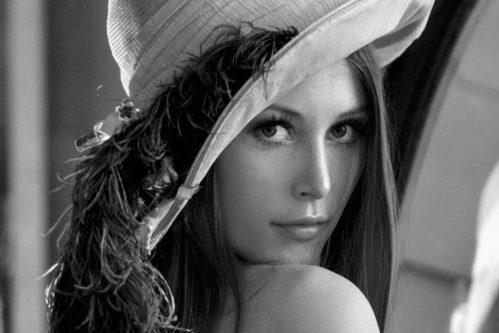

In [ ]:
image = cv.cvtColor(io.imread(image_path + "mulher.jpg"), cv.COLOR_RGBA2GRAY)

cv2_imshow(cv.resize(image, None, fx=.52, fy=.52))

**Transformação de Fourier**

No código abaixo é aplicada a tranformada de fourier na imagem, como função nativa da biblioteca NumPy.

Como resultado se tem o espectro da transformada de fourier com as baixas frequências nos cantos e as altas frequências no centro.

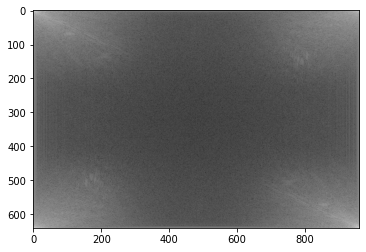

In [ ]:
image_fft = np.fft.fft2(image)
plt.imshow(np.log(1 + np.abs(image_fft)), cmap="gray")
plt.show()

**Shift**

No código abaixo é aplicado o shift.

Agora as baixas frequências ficam no centro e as altas ficam nos cantos. Essa composição facilita a utilização dos filtros.

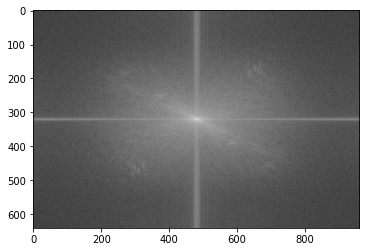

In [ ]:
image_fft_shift = np.fft.fftshift(image_fft)
plt.imshow(np.log(1 + np.abs(image_fft_shift)), cmap="gray")
plt.show()

**Shift Inverso**

Após a aplicação de algum filtro, é feito o shift inverso no codigo abaixo.

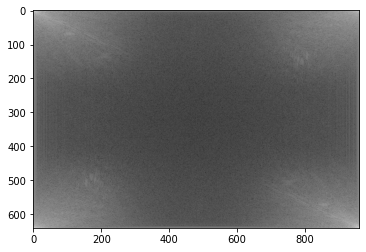

In [ ]:
image_fft_shift_inverso = np.fft.ifftshift(image_fft_shift)

plt.imshow(np.log(1 + np.abs(image_fft_shift_inverso)), cmap="gray")
plt.show()

**Transformada Inversa de Fourier.**

Como nenhum filtro foi aplicado a imagem original é restaurada sem perdas de informações



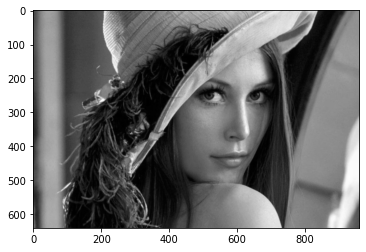

In [ ]:
image_fft_inversa = np.fft.ifft2(image_fft_shift_inverso)
plt.imshow(np.abs(image_fft_inversa), cmap="gray")
plt.show()

**Distância Euclidiana**

In [ ]:
from math import sqrt

def distancia_euclidiana(point_1,point_2):
    return sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2)

# **Filtro passa-baixa Gaussiano**

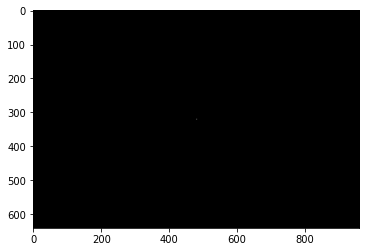

In [ ]:
def filtro_passa_baixa_gaussiano(D_0, image_shape, n):
    e = 2.7182
    base = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = e ** - (distancia_euclidiana((y, x), center)) ** 2 / (2 * D_0 ** 2)
    return base

img_passa_baixa_gaussiano = filtro_passa_baixa_gaussiano(50, image.shape, 3)
plt.imshow(np.abs(img_passa_baixa_gaussiano), "gray")
plt.show()

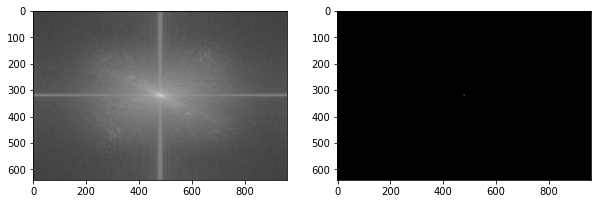

In [ ]:
#Aplicação do filtro na imagem após o shift:

passa_baixa_gaussiano = image_fft_shift * img_passa_baixa_gaussiano

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(np.log(1 + np.abs(image_fft_shift)), cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.log(1 + np.abs(passa_baixa_gaussiano)), cmap="gray")

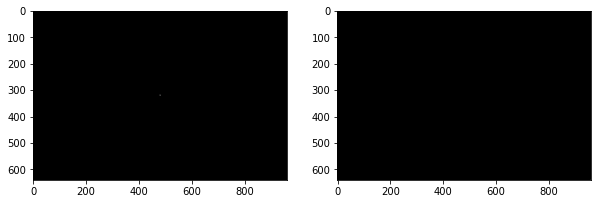

In [ ]:
#Aplicação do shift inverso:

passa_baixa_gaussiano_shift_inverso = np.fft.ifftshift(passa_baixa_gaussiano)

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(np.log(1 + np.abs(passa_baixa_gaussiano)), cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.log(1 + np.abs(passa_baixa_gaussiano_shift_inverso)), cmap="gray")

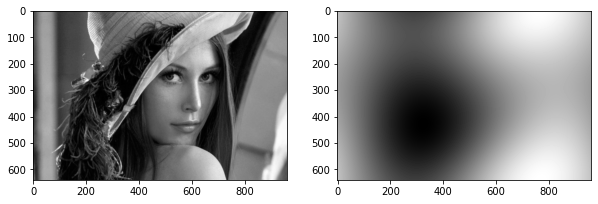

In [ ]:
#Aplicação da transformada inversa de fourier:

passa_baixa_gaussiano_inverso = np.fft.ifft2(passa_baixa_gaussiano_shift_inverso)

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(image, cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.abs(passa_baixa_gaussiano_inverso), cmap="gray")

# **Filtro Passa-alta Gaussiano**

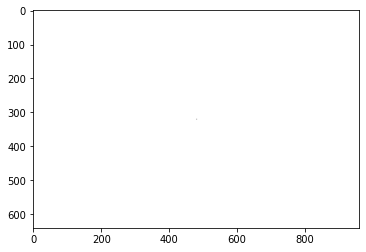

In [ ]:
def filtro_passa_alta_gaussiano(D_0, image_shape, n):
    e = 2.7182
    base = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = 1 - e ** - (distancia_euclidiana((y, x), center)) ** 2 / (2 * D_0 ** 2)
    return base

img_passa_alta_gaussiano = filtro_passa_alta_gaussiano(50, image.shape, 3)
plt.imshow(np.abs(img_passa_alta_gaussiano), "gray")
plt.show()

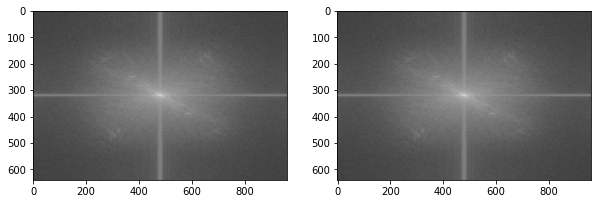

In [ ]:
#Aplicação do filtro na imagem após o shift:

passa_alta_gaussiano = image_fft_shift * img_passa_alta_gaussiano

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(np.log(1 + np.abs(image_fft_shift)), cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.log(1 + np.abs(passa_alta_gaussiano)), cmap="gray")

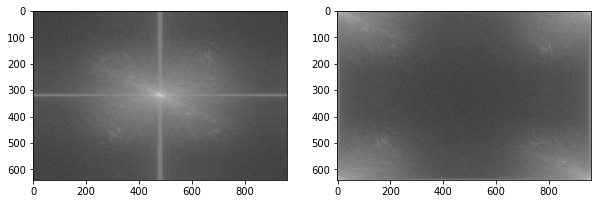

In [ ]:
#Aplicação do shift inverso:

passa_alta_gaussiano_shift_inverso = np.fft.ifftshift(passa_alta_gaussiano)

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(np.log(1 + np.abs(passa_alta_gaussiano)), cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.log(1 + np.abs(passa_alta_gaussiano_shift_inverso)), cmap="gray")

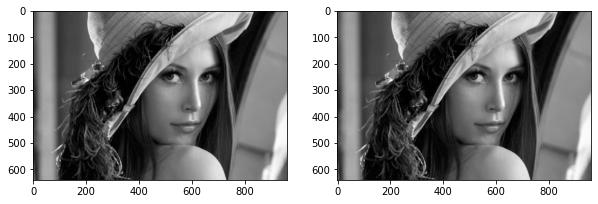

In [ ]:
#Aplicação da transformada inversa de fourier:

passa_alta_gaussiano_inverso = np.fft.ifft2(passa_alta_gaussiano_shift_inverso)

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(image, cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.abs(passa_alta_gaussiano_inverso), cmap="gray")

# **Filtro passa-alta ideal**

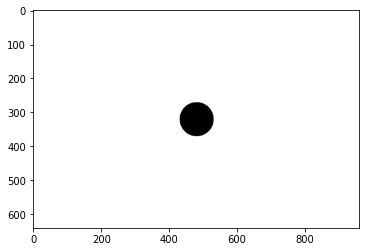

In [ ]:
def filtro_passa_alta_ideal(D_0, image_shape):
    base = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            if distancia_euclidiana((y, x), center) > D_0:
                base[y, x] = 1
    return base

img_passa_alta_ideal = filtro_passa_alta_ideal(50, image.shape)
plt.imshow(np.abs(img_passa_alta_ideal), "gray")
plt.show()

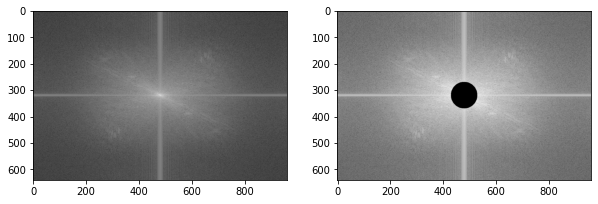

In [ ]:
#Aplicação do filtro na imagem após o shift:

passa_alta_ideal = image_fft_shift * img_passa_alta_ideal

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(np.log(1 + np.abs(image_fft_shift)), cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.log(1 + np.abs(passa_alta_ideal)), cmap="gray")

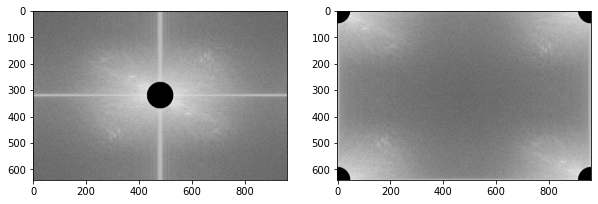

In [ ]:
#Aplicação do shift inverso:

passa_alta_ideal_shift_inverso = np.fft.ifftshift(passa_alta_ideal)

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(np.log(1 + np.abs(passa_alta_ideal)), cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.log(1 + np.abs(passa_alta_ideal_shift_inverso)), cmap="gray")

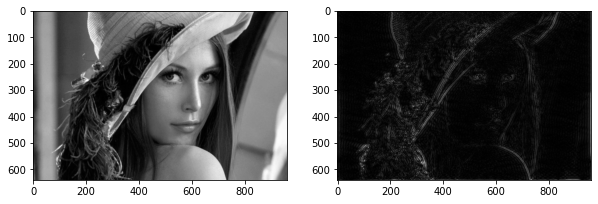

In [ ]:
#Aplicação da transformada inversa de fourier:

passa_alta_ideal_inverso = np.fft.ifft2(passa_alta_ideal_shift_inverso)

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(image, cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.abs(passa_alta_ideal_inverso), cmap="gray")

# **Filtro passa-alta ButterWorth**

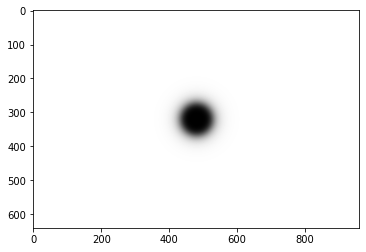

In [ ]:
def passa_alta_butterworth(D_0, imgageShape, n):
    base = np.zeros(imgageShape[:2])
    rows, cols = imgageShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-(1/(1+(distancia_euclidiana((y,x), center)/D_0)**(2*n)))
    return base

HighPass_BW = passa_alta_butterworth(50, image.shape, 3)
plt.imshow(np.abs(HighPass_BW), "gray")

plt.show()

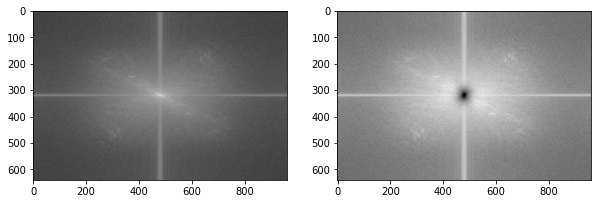

In [ ]:
#Aplicação do filtro na imagem após o shift:

passa_alta_butterworth = image_fft_shift * img_passa_alta_butterworth

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(np.log(1 + np.abs(image_fft_shift)), cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.log(1 + np.abs(passa_alta_butterworth)), cmap="gray")

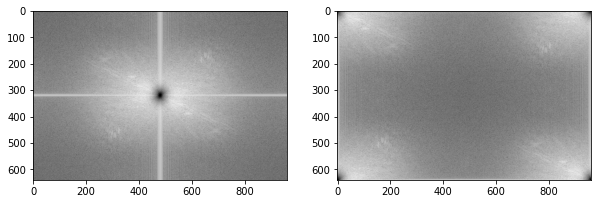

In [ ]:
#Aplicação do shift inverso:

passa_alta_butterworth_shift_inverso = np.fft.ifftshift(passa_alta_butterworth)

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(np.log(1 + np.abs(passa_alta_butterworth)), cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.log(1 + np.abs(passa_alta_butterworth_shift_inverso)), cmap="gray")

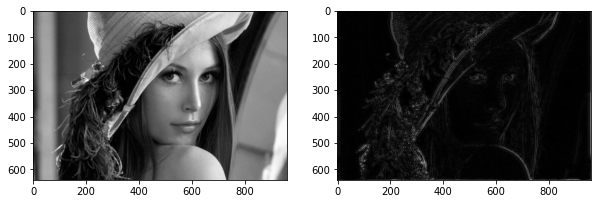

In [ ]:
#Aplicação da transformada inversa de fourier:

passa_alta_butterworth_inverso = np.fft.ifft2(passa_alta_butterworth_shift_inverso)

fig = plt.figure(figsize=(10,6))

aux1 = fig.add_subplot(1, 2, 1)
aux1.imshow(image, cmap="gray")

aux2 = fig.add_subplot(1, 2, 2)
aux2.imshow(np.abs(passa_alta_butterworth_inverso), cmap="gray")

# **Todos os resultados**

Text(0.5, 1.0, 'Filtro passa-alta ButterWorth')

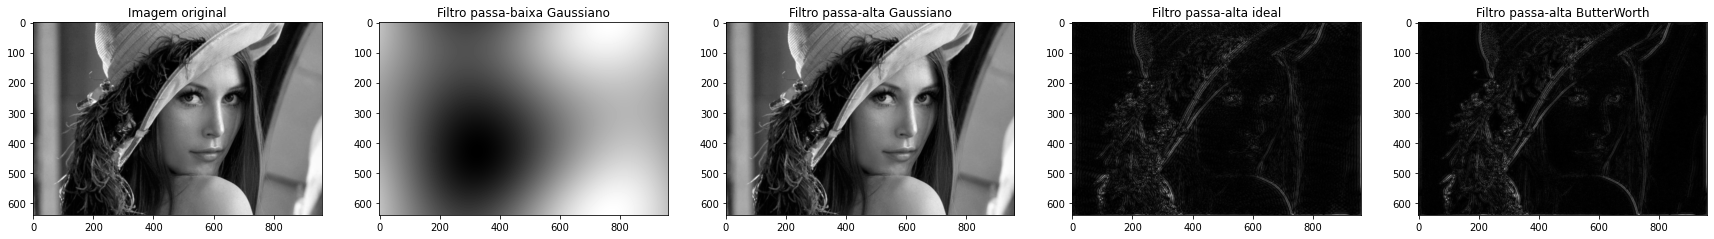

In [ ]:
fig = plt.figure(figsize=(10 * 3, 6 * 3), constrained_layout=False)

# Imagem original
fig1 = fig.add_subplot(1, 5, 1)
fig1.imshow(image, cmap="gray")
plt.title("Imagem original")

# Filtro passa-baixa Gaussiano
fig2 = fig.add_subplot(1, 5, 2)
fig2.imshow(np.abs(passa_baixa_gaussiano_inverso), cmap="gray")
plt.title("Filtro passa-baixa Gaussiano")

# Filtro passa-alta Gaussiano
fig3 = fig.add_subplot(1, 5, 3)
fig3.imshow(np.abs(passa_alta_gaussiano_inverso), cmap="gray")
plt.title("Filtro passa-alta Gaussiano")

# Filtro passa-alta ideal
fig4 = fig.add_subplot(1, 5, 4)
fig4.imshow(np.abs(passa_alta_ideal_inverso), cmap="gray")
plt.title("Filtro passa-alta ideal")

# Filtro passa-alta ButterWorth
fig5 = fig.add_subplot(1, 5, 5)
fig5.imshow(np.abs(passa_alta_butterworth_inverso), cmap="gray")
plt.title("Filtro passa-alta ButterWorth")